# Prac 08.1

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\yevhe\AppData\Local\Temp\ipykernel_16112\1928204857.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx + ii])])


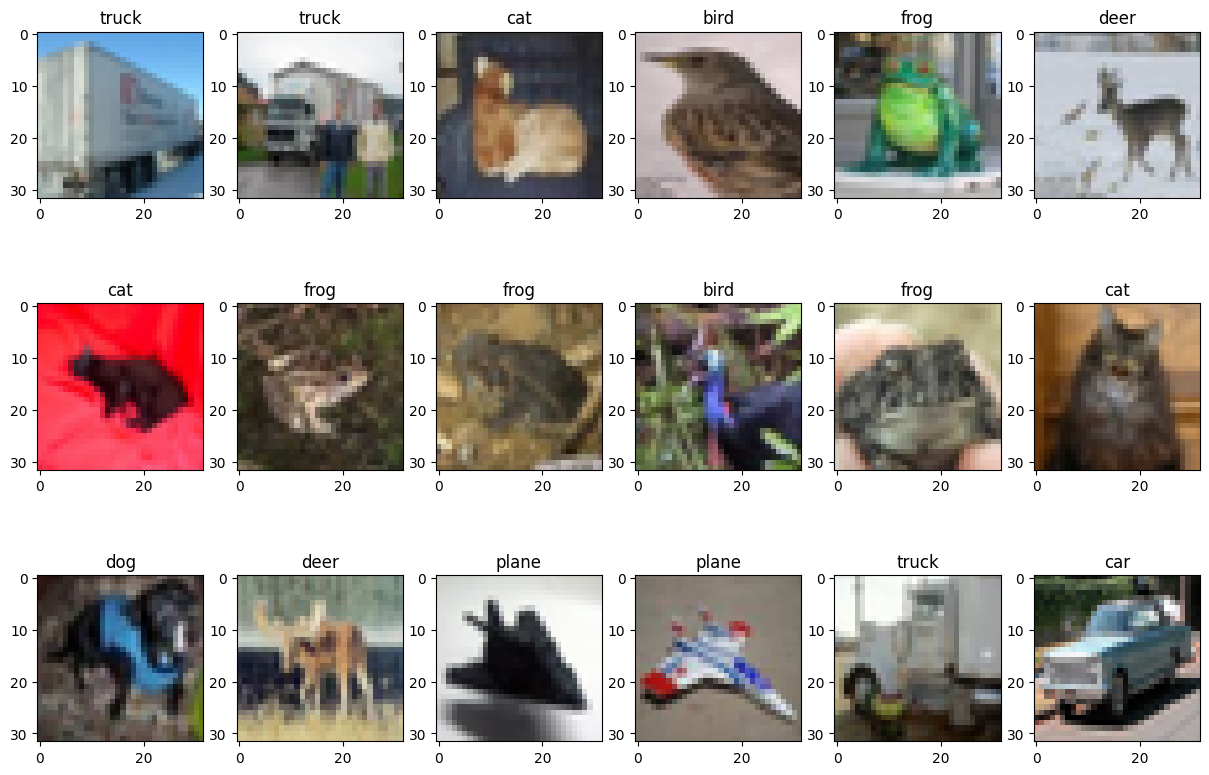

In [8]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = 15
    # Show the image and the label
    plt.imshow(x_train[idx + ii, ...])
    plt.title(classes[int(y_train[idx + ii])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

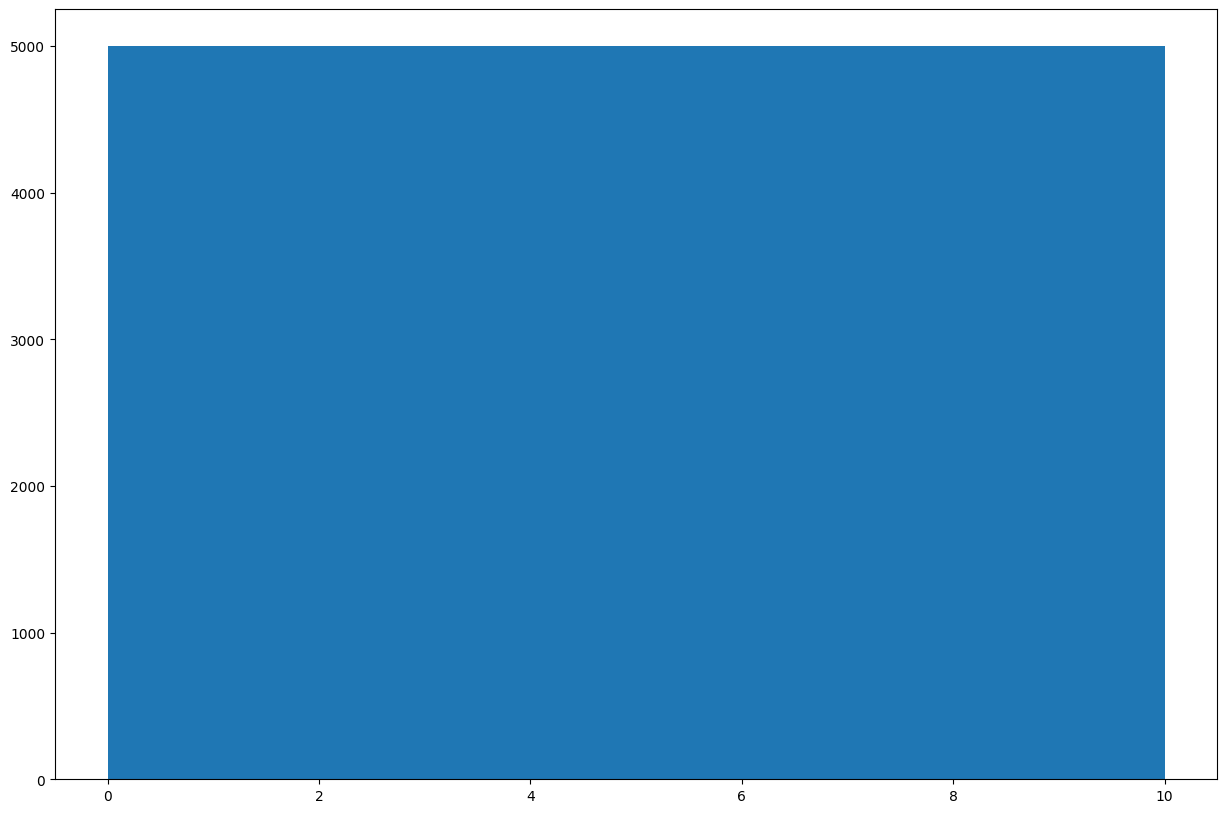

In [9]:
# Compute the class histogram
plt.hist(y_train, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [10]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)
print('Labels dims: ', y_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)
Labels dims:  (50000, 1, 10)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [13]:
inputs = Input(shape=(32, 32, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(4, 4))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,778 (81.16 KB)

 Trainable params: 20,778 (81.16 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [14]:
epochs = 25
batch_size = 256

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, np.reshape(y_train, (y_train.shape[0], 10)), epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.2908 - loss: 1.9868 - val_accuracy: 0.4764 - val_loss: 1.4940
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.4887 - loss: 1.4495 - val_accuracy: 0.5488 - val_loss: 1.3263
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5439 - loss: 1.3099 - val_accuracy: 0.5852 - val_loss: 1.2324
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5719 - loss: 1.2301 - val_accuracy: 0.5988 - val_loss: 1.1793
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5932 - loss: 1.1687 - val_accuracy: 0.6110 - val_loss: 1.1327
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6109 - loss: 1.1203 - val_accuracy: 0.6220 - val_loss: 1.0969
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6271 - loss: 1.0809 - val_accuracy: 0.6312 - val_loss: 1.0684
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6381 - loss: 1.0480 - val_acc

Train Acc      0.7157333493232727
Validation Acc 0.6833999752998352


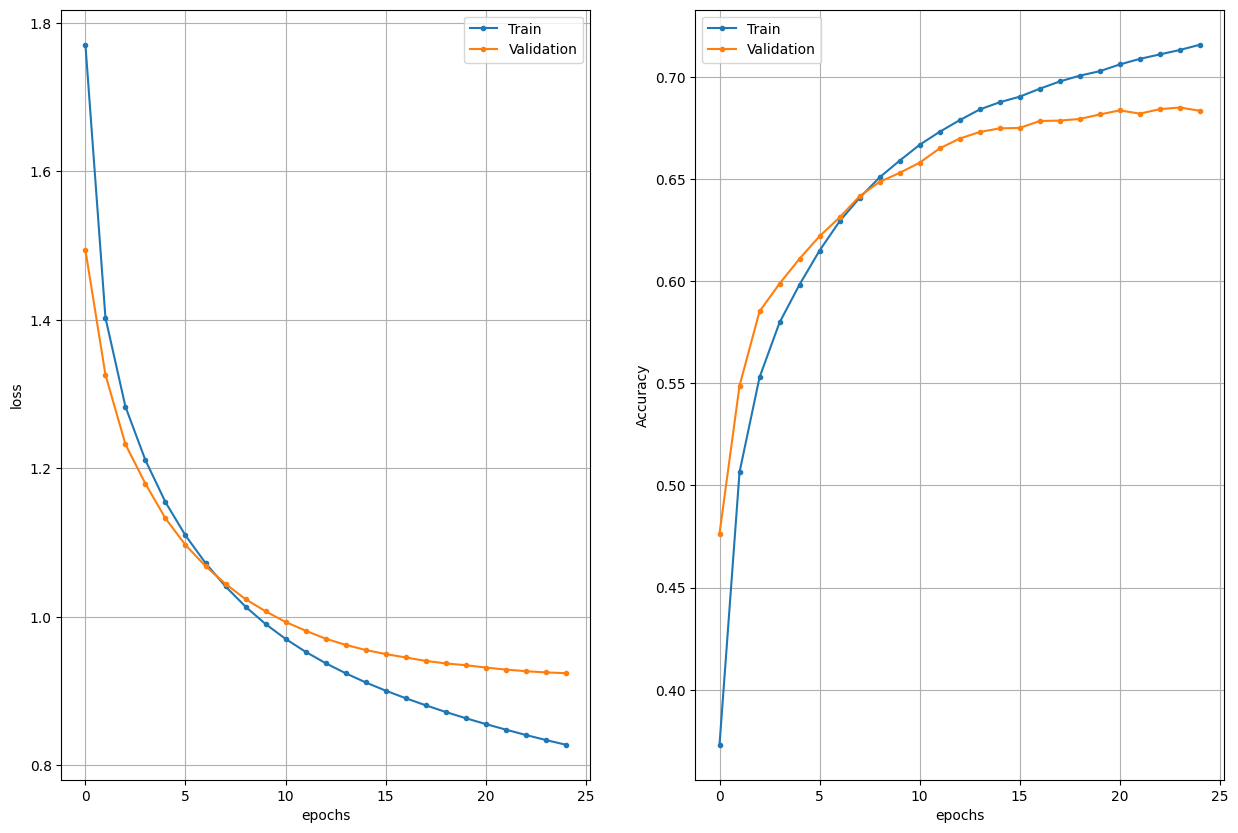

In [15]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [16]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(np.reshape(y_test, (y_test.shape[0], y_test.shape[2])), axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = np.where(y_true == class_id)
    acc = np.mean(np.equal(y_true[mask], y_pred[mask]))
    print(class_name, acc)

plane 0.736
car 0.826
bird 0.624
cat 0.472
deer 0.57
dog 0.556
frog 0.821
horse 0.689
ship 0.735
truck 0.72


In [18]:
y_test_2 = np.reshape(y_test, (y_test.shape[0], y_test.shape[2]))

In [19]:
# Print the overall stats
ev = model.evaluate(x_test, y_test_2)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6833 - loss: 0.9365
Test loss   0.9589673280715942
Test metric 0.6748999953269958


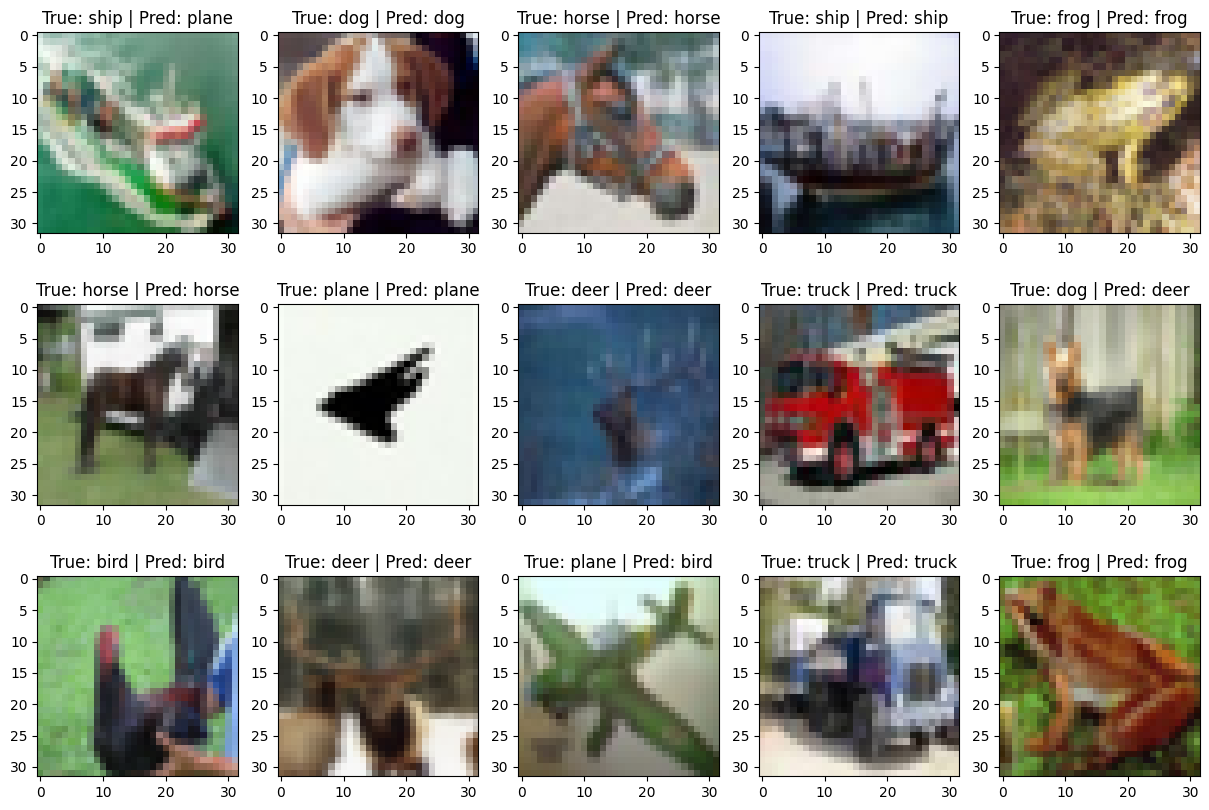

In [20]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = 15
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx + ii, ...])
    plt.title('True: ' + str(classes[np.argmax(y_test[idx + ii])]) + ' | Pred: ' + str(classes[y_pred[idx + ii]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?